# Gardening-robot

## Criando um Robô Jardineiro 

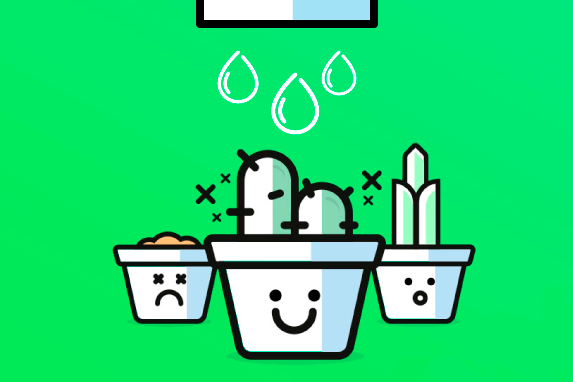

In [1]:
from IPython.display import Image
Image("p.png")

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import seaborn as sns

%matplotlib inline

### Explorando dados

In [4]:
df = pd.read_csv('plantacao.csv')

In [5]:
df.columns

Index([u'ID', u' MES', u' DIA', u' Hora', u' umidade '], dtype='object')

In [6]:
print "Total de amostras coletados do dataset: ",len(df)

Total de amostras coletados do dataset:  5403


### Pre-processando dados

In [7]:
df.describe()

,ID,MES,DIA,Hora,umidade
count,5403.000000,5403.000000,5403.000000,5403.000000,5403.000000
mean,2.931890,5.514344,20.991116,11.572090,60.335739
std,0.990788,0.499840,1.396667,7.030724,25.768100
min,1.000000,5.000000,19.000000,0.000000,0.000000
25%,2.000000,5.000000,20.000000,5.000000,47.000000
50%,3.000000,6.000000,21.000000,12.000000,64.000000
75%,4.000000,6.000000,22.000000,18.000000,81.000000
max,4.000000,6.000000,23.000000,23.000000,99.000000


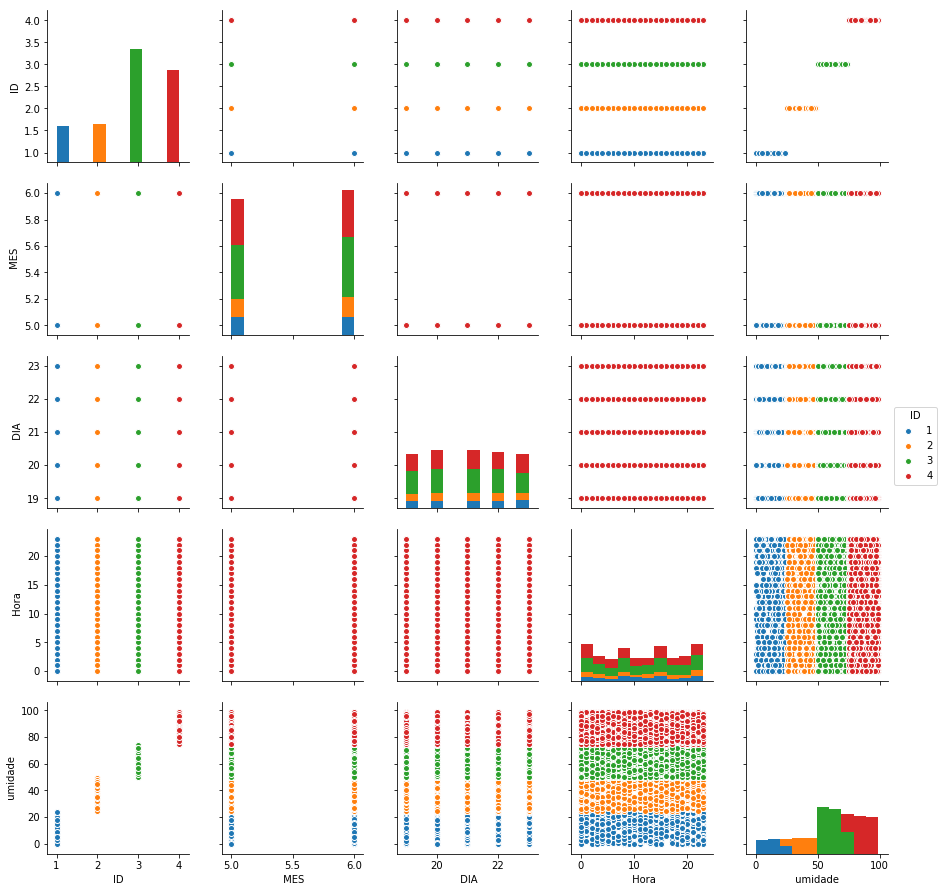

In [8]:
#sb.pairplot(df, hue='ID')
sb.pairplot(df,hue='ID')

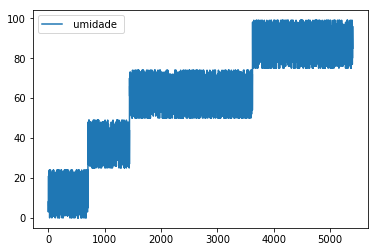

In [9]:
umidade = df[df.columns[4:]] 
umidade.plot()

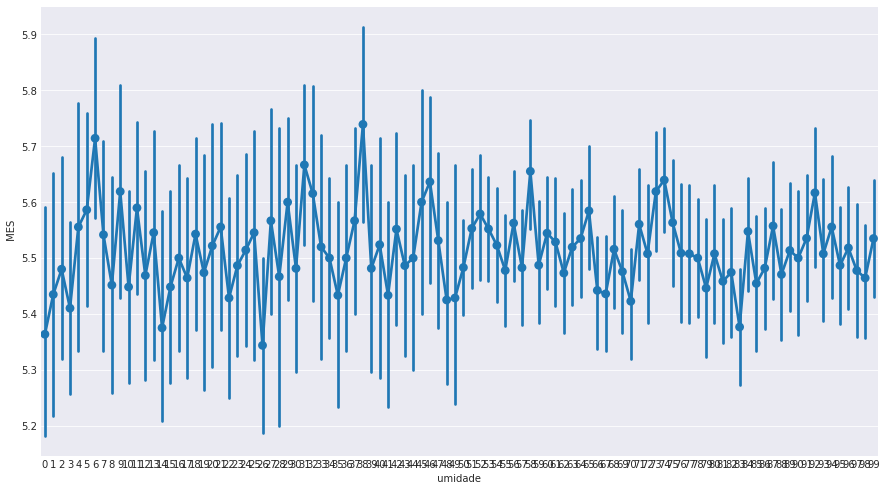

In [10]:
sns.set_style("darkgrid")
fig, ax = plt.subplots()

fig.set_size_inches(15, 8.27)
sns.pointplot(x=" umidade ", y=" MES",data=df, join=True, capsize=0, size=0, aspect=0)


## Criando Variavel de Treino

In [11]:
#print df.drop('ID',axis = 1)
X = np.array(df.drop('ID',axis = 1))

## Criando Variavel de Test

In [12]:
y = np.array(df["ID"])
type(y)
type(df["ID"])

pandas.core.series.Series

### Classificando com K-NN
#### Aqui basicamente vamos pegar nossas variaveis de treino e test e vamos aplicar no classificador que irá aprender de acordo com os dados que colocamos como entrada

In [15]:
from sklearn.neighbors import KNeighborsClassifier

In [16]:
knn = KNeighborsClassifier(n_neighbors=4)

In [17]:
print knn.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='uniform')


### Valor  de distancia do K em NN

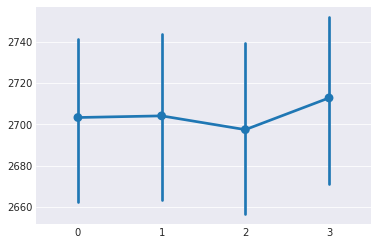

In [20]:
distances, indices = knn.kneighbors(X)
sns.pointplot(data=indices)

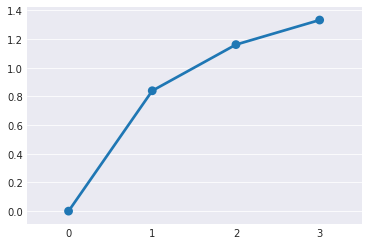

In [23]:
#print distances
sns.pointplot(data=distances)

## Fazendo uma Predição com dados novos de outro sensor

In [24]:
def predicao(lista):
 nivel =  knn.predict([lista])
 if nivel[0] == 1: return "arido"
 if nivel[0] == 2: return "seco"
 if nivel[0] == 3: return "umido"
 if nivel[0] == 4: return "molhado"

In [ ]:
MES = raw_input("MES: ")
DIA = raw_input("DIA: ")
Hora = raw_input("Hora: ")
umidade = raw_input("umidade ")
lista = [MES,DIA, Hora, umidade]
pred = predicao(lista)
print pred